# CURSO DE ESTADÍSTICA

## Preparando el ambiente

## 1 CONOCIENDO LOS DATOS

### 1.1 Dataset del proyecto

**Muestra de domicilios Colombia - 2018**


Las investigaciones por muestras de domicilios realizadas anualmente, buscan encontrar característcias generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.

**Datos**


Los datos fueron creados de manera didáctica para este curso.

**Variables utilizadas**

**Ingreso**

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

**Edad**

Edad del entrevistado en la fecha de referencia en años.

**Altura**

Altura del entrevistado em metros.

**Ciudad**

Código de referência a 27 ciudades analizadas.

**Sexo**

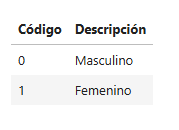


**Años de Estudio**

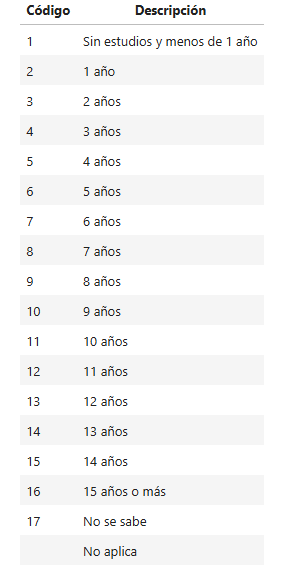

**Color**

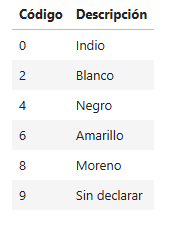

**Tratamiento a los datos**

Algunos de los tratamientos de datos más frecuentes son:

*   Eliminar las observaciones (líneas) con entradas de datos inválidos;
*   Eliminar observaciones donde hay datos perdidos (missing data);
*   Filtros própios de la investigación, por ejemplo: considerar solo las     encuestas realizadas a la cabeza de familia (responsable por el domicilio).


### Importando pandas y leyendo el dataset del projecto

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('datos.csv')

In [3]:
# Vamnos a revisar los datos aleatorios con .sample
datos.sample(10)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
68702,50,1,42,8,12,1200,1.569045
5279,15,0,36,8,5,900,1.831500
17195,23,1,56,8,1,0,1.733468
7491,15,0,45,8,2,200,1.682311
19053,25,1,54,8,2,120,1.723530
8376,15,0,25,2,6,300,1.689834
57522,41,0,27,2,15,1600,1.674805
9131,15,0,39,4,12,2000,1.758244
60022,42,0,56,2,14,3000,1.732504
49662,35,0,37,2,16,2500,1.648793


### 1.2 Tipos de datos

**Clasificación de una variable**

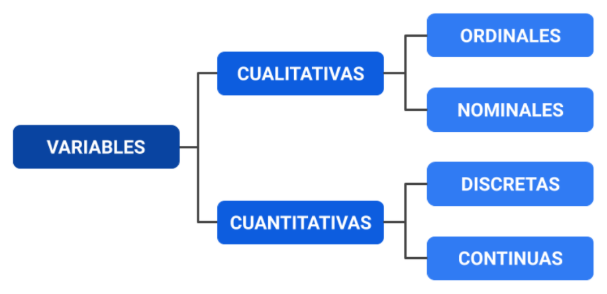

### Variables cualitativas

#### Variables cualitativas ordinales

Variables que pueden ser ordenadas o que responen algun tipo de jerarquía

In [4]:
sorted(datos['Años de Estudio'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17)]

#### Variables cualitativas nominales

 Variables que no pueden ser ordenadas ni responden alguna jerarquía.

In [5]:
sorted(datos['Sexo'].unique())

[np.int64(0), np.int64(1)]

In [6]:
sorted(datos['Color'].unique())

[np.int64(0), np.int64(2), np.int64(4), np.int64(6), np.int64(8)]

In [7]:
sorted(datos['Ciudad'].unique())

[np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(35),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53)]

### Variables cuantitativas

#### Variables cuantitativas discretas

Variables que representan un conteo donde los valores posibles forman un conjunto finito o numerable.

In [8]:
# Como conosco el dato finito

datos.Edad.min()

13

In [9]:
datos.Edad.max()

99

In [10]:
print(f'La edad mínima es {datos.Edad.min()} y la edad máxima es {datos.Edad.max()}.')

La edad mínima es 13 y la edad máxima es 99.


**Observación**

La variable edad puede ser clasificada de tres formas diferentes:

*   CUANTITATIVA DISCRETA - cuando representa años completos (números enteros);
*   CUANTITATIVA CONTINUA - cuando representa la edad exacta, siendo representada por fracciones de años;
*   CUALITATIVA ORDINAL - cuando representa intervalos de edad.


#### Variables cuantitativas continuas

Variables que representan un conteo o medición que asume valores en escalas continuas (números reales).

In [11]:
print(f'La altura mínima es {datos.Altura.min()} y la altura máxima es {datos.Altura.max()}')

La altura mínima es 1.339244614 y la altura máxima es 2.028496765


Es importante identificar la cada tipo de variable, para realizar el análisis adecuado


**Truco de detección rápida**


¿Es un texto? → **Cualitativa **(Nominal u Ordinal).

¿Es un número?

¿Solo cuenta cosas enteras? → **Cuantitativa discreta**.

¿Puede tener decimales? → **Cuantitativa continua**.

Si es texto pero con jerarquía (ej. “bajo, medio, alto”) → Cualitativa ordinal.

## 2 DISTRIBUCIÓN DE FRECUENCIAS

El primer paso en un análisis es conocer el comportamiento de las variables involucradas en el estudio. Utilizando técnicas estadísticas como el análisis de las DISTRIBUCIONES DE FRECUENCIAS e HISTOGRAMAS podemos evaluar mejor cómo se distribuyen los fenómenos del estudio.

#### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [12]:
# Iniciamos con variables cualitativas
datos.Sexo.value_counts()

,count
Sexo,
0,53250
1,23590


In [13]:
# Para conocer el porcentaje usamos normalize

datos.Sexo.value_counts(normalize=True).round(4)*100

,proportion
Sexo,
0,69.3
1,30.7


In [14]:
# Vamos a crrear una variable con esta información

frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

,count
Sexo,
0,53250
1,23590


In [15]:
porcentaje_sexo = datos.Sexo.value_counts(normalize=True).round(4)*100
porcentaje_sexo

,proportion
Sexo,
0,69.3
1,30.7


In [16]:
"""
Una vez creadas las variables podemos crear una
tabla con el apoyo de un df
Indicamos la columnas a partir de las variables creadas
"""

dist_frec_cualitativa = pd.DataFrame([frecuencia_sexo,porcentaje_sexo])

In [17]:
dist_frec_cualitativa

Sexo,0,1
count,53250.0,23590.0
proportion,69.3,30.7


In [18]:
dist_frec_cualitativa = pd.DataFrame({'Frecuencia':frecuencia_sexo, 'Porcentaje':porcentaje_sexo})

In [19]:
dist_frec_cualitativa

,Frecuencia,Porcentaje
Sexo,,
0,53250,69.3
1,23590,30.7


In [20]:
dist_frec_cualitativa.rename(index={1:'Femenino',0: 'Masculino'}, inplace=True)

In [21]:
dist_frec_cualitativa.rename_axis('Sexo', axis= 'columns', inplace=True )

In [22]:
dist_frec_cualitativa

Sexo,Frecuencia,Porcentaje
Sexo,,
Masculino,53250,69.3
Femenino,23590,30.7


#### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [23]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indigena',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}

In [24]:
#  traves de pandas llamamos el crosstab

frecuencia = pd.crosstab(datos['Sexo'], datos['Color'])

In [25]:
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [26]:
frecuencia.rename(index=sexo, inplace=True)
frecuencia.rename(columns=color, inplace=True)
frecuencia

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


# Ejercicio 1

In [27]:
porcentaje = pd.crosstab(datos['Sexo'],
                         datos['Color'],
                         normalize=True).round(4)*100
porcentaje.rename(index=sexo, inplace=True)
porcentaje.rename(columns=color, inplace=True)
porcentaje

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Femenino,0.13,12.52,3.76,0.15,14.14


### 2.2 Distribución de frecuencia para variables cuantitativas (clases personalizadas)

#### Creación de tablas de frecuencias

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

**Paso 1 - Especifique los límites de cada clase**

Utilice la siguiente clasificación:

**A** ► Más de 20 SM

**B** ► De 10 a 20 SM

**C** ► De 4 a 10 SM

**D** ► De 2 a 4 SM

**E** ► Hasta 2 SM

donde SM es el valor del salario mínimo en ese momento. En nuestro caso 788 mil pesos colombianos (2018):

**A **► Más de 15.760

**B** ► De 7.880 a 15.760

**C** ► De 3.152 a 7.880

**D** ► De 1.576 a 3.152

**E** ► Hasta 1.576


Una vez definidas las variables vamos a explorar nuestra variable de ingresos

In [28]:
print(f'El salario minimos es {datos.Ingreso.min()} y el salario máximo es {datos.Ingreso.max()}')

El salario minimos es 0 y el salario máximo es 200000


In [29]:
clases = [0, 1576, 3152, 7880, 15760, datos.Ingreso.max()]
label = ['E', 'D', 'C', 'B', 'A']

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [30]:
# primero vamos a ver los valores abosluto

frecuencia = pd.value_counts(
              pd.cut(datos['Ingreso'],
                    bins=clases,
                    labels=label,
                    include_lowest=True))

frecuencia

/tmp/ipython-input-912593176.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia = pd.value_counts(


,count
Ingreso,
E,49755
D,16700
C,7599
B,2178
A,608


In [31]:
# En porcentaje usamos normalize

frecuencia = pd.value_counts(
              pd.cut(x = datos['Ingreso'],
                    bins=clases,
                    labels=label,
                    include_lowest=True),
                     normalize=True).round(4)*100

frecuencia

/tmp/ipython-input-3901057455.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia = pd.value_counts(


,proportion
Ingreso,
E,64.75
D,21.73
C,9.89
B,2.83
A,0.79


¿Cómo juntamos esta información en una tabla en conjunto?

Usamos una nueva variable

In [32]:
dist_frec_cuant_personalizado = pd.DataFrame({'Frecuencia':frecuencia, 'Porcentaje %':frecuencia})
dist_frec_cuant_personalizado.sort_index(ascending=False)

,Frecuencia,Porcentaje %
Ingreso,,
A,0.79,0.79
B,2.83,2.83
C,9.89,9.89
D,21.73,21.73
E,64.75,64.75


### 2.3 Distribución de frecuencia para variables cuantitativas (clases de amplitud fija)

Importando bibliotecas

http://www.numpy.org/

In [33]:
import numpy as np

Paso 1 - Difiniendo el número de clases

#### Regla de Sturges

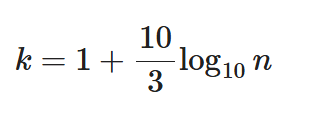

In [34]:
# Primero dimensionar la base de datos

datos.shape[0]

76840

In [35]:
# Definimos una variable con el total, llamada n

n = datos.shape[0]

In [36]:
# Cálculamos k
k = 1 + (10/3) * np.log10(n)

In [37]:
k

np.float64(17.285291187298853)

#### Paso 2 - Crear la tabla de frecuencias

In [38]:
frecuencia_sturges = pd.value_counts(
              pd.cut(x = datos['Ingreso'],
                    bins=int(k),
                    include_lowest=True))

frecuencia_sturges

/tmp/ipython-input-1231246928.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia_sturges = pd.value_counts(


,count
Ingreso,
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(94117.647, 105882.353]",6
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(188235.294, 200000.0]",3


In [39]:
# Ahora traemos los porcentajes

porcentaje_sturges = pd.value_counts(
              pd.cut(x = datos['Ingreso'],
                    bins=int(k),
                    include_lowest=True),
                    sort = False,
                    normalize=True) *100

porcentaje_sturges

/tmp/ipython-input-1639574446.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje_sturges = pd.value_counts(


,proportion
Ingreso,
"(-200.001, 11764.706]",98.378449
"(11764.706, 23529.412]",1.330036
"(23529.412, 35294.118]",0.219938
"(35294.118, 47058.824]",0.024727
"(47058.824, 58823.529]",0.020822
"(58823.529, 70588.235]",0.006507
"(70588.235, 82352.941]",0.005206
"(82352.941, 94117.647]",0.001301
"(94117.647, 105882.353]",0.007808


In [45]:
# Creamnos la tabla con frecuencia y porcentaje

dist_frec_cuant_sturges = pd.DataFrame({'Frecuencia':frecuencia_sturges, 'Porcentaje %':porcentaje_sturges})
dist_frec_cuant_sturges.sort_index(ascending=False)


,Frecuencia,Porcentaje %
Ingreso,,
"(188235.294, 200000.0]",3,0.003904
"(176470.588, 188235.294]",0,0.000000
"(164705.882, 176470.588]",0,0.000000
"(152941.176, 164705.882]",0,0.000000
"(141176.471, 152941.176]",0,0.000000
"(129411.765, 141176.471]",0,0.000000
"(117647.059, 129411.765]",1,0.001301
"(105882.353, 117647.059]",0,0.000000
"(94117.647, 105882.353]",6,0.007808


### 2.4 Histograma

El HISTOGRAMA es la representación gráfica de una distribución de frecuencia. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

Importando la biblioteca

https://seaborn.pydata.org/

In [46]:
import seaborn as sns

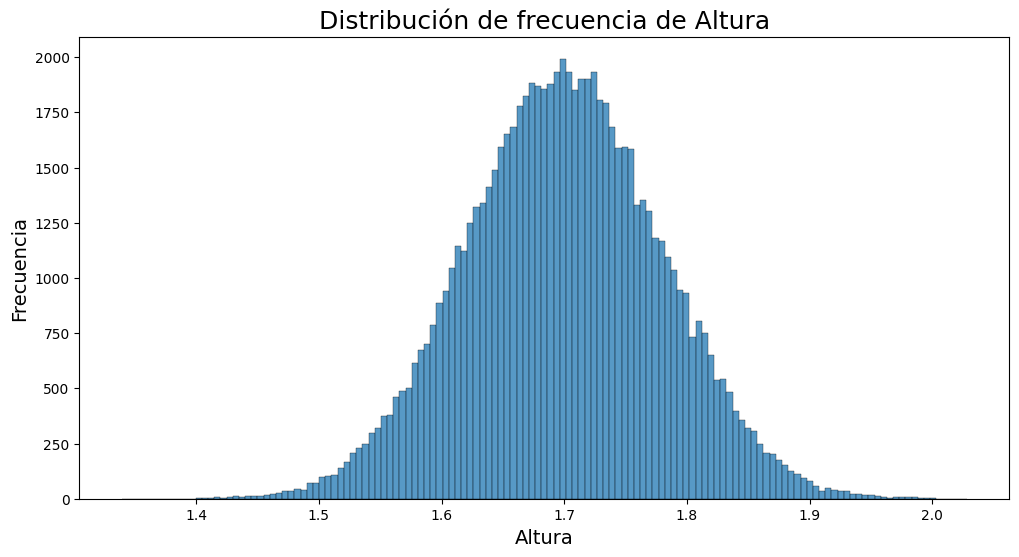

In [50]:
# Creamos la figura para el grafico
import matplotlib.pyplot as plt

# Creamos el gráfico
ax = sns.histplot(datos['Altura'], kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia de Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.set(xlabel='Altura', ylabel='Frecuencia')

plt.show()

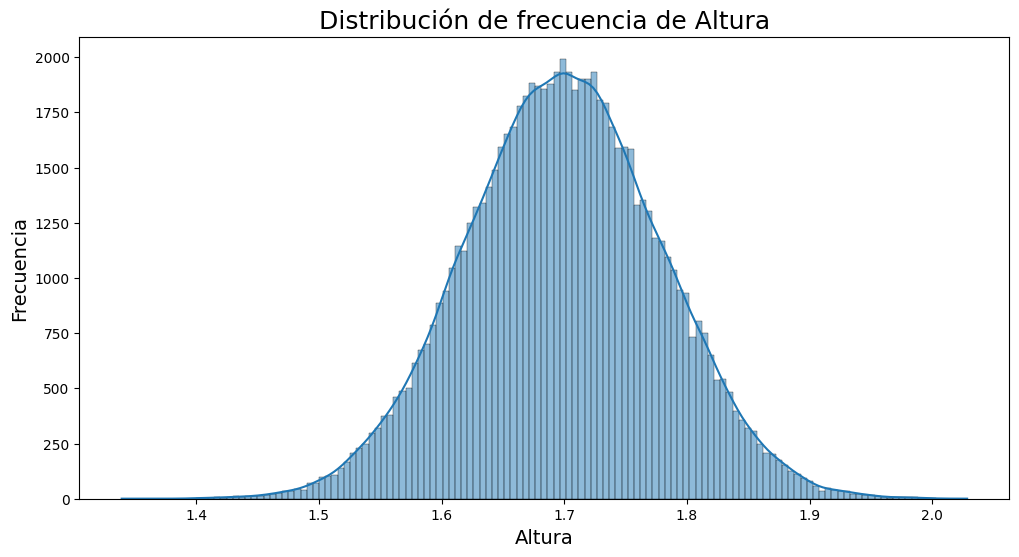

In [52]:
import matplotlib.pyplot as plt

ax = sns.histplot(datos['Altura'], kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia de Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.set(xlabel='Altura', ylabel='Frecuencia')

plt.show()

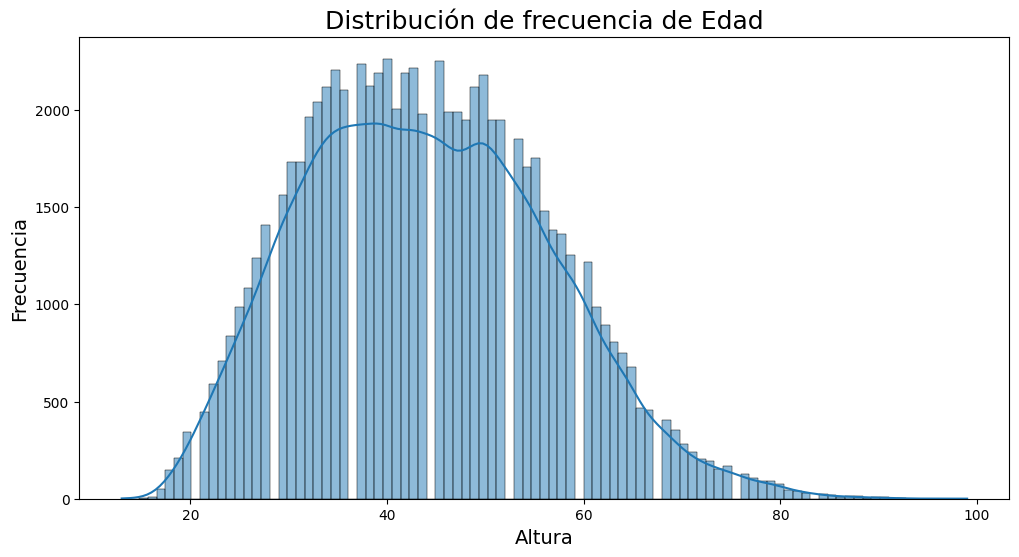

In [53]:
# Creamos la distribución por edad

ax = sns.histplot(datos['Edad'], kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia de Edad', fontsize=18)
ax.set_xlabel('Edad)', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.set(xlabel='Altura', ylabel='Frecuencia')

plt.show()

## 3 MEDIDAS DE TENDENCIA CENTRAL

DataFrame de ejemplo

In [54]:
df = pd.DataFrame(data = {'María': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


### 3.1 Media aritmética

In [55]:
#.mean()

Es representada por m cuando se refiere a la población y por X cuando se refiere a la muestra

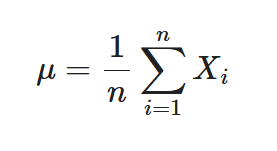

donde

n = número de observaciones (registros)

X1 = valor de la i-ésima observación (registro)

In [56]:
# La función para calcular la media es .mean

df['María'].mean()

np.float64(7.714285714285714)

In [57]:
# Es posible agrupar variables

datos.groupby(['Sexo'])['Ingreso'].mean()

,Ingreso
Sexo,
0,2192.441596
1,1566.847393


Es importante recordar que los valores muy extremos van a impactar la media. por lo que debemos tratar esos datos

### 3.2 Mediana

Para obtener la mediana de un conjunto de datos, debemos proceder de la siguiente manera:


*   Ordenar el conjunto de datos;
*   Identificar el número de observaciones (registros) del conjunto de datos (
);
*   Identicar el elemento del medio:*

Cuando n
 sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:

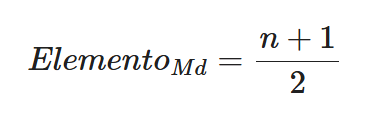


Cuando n
 sea par, la posición del elemento mediano se obtendrá de la siguiente manera:

 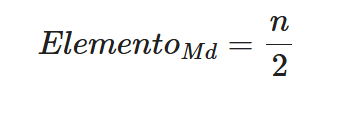

Obtener la mediana:

Cuando n
 sea impar:

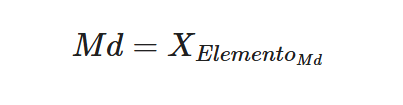

Cuando n
 sea par:

 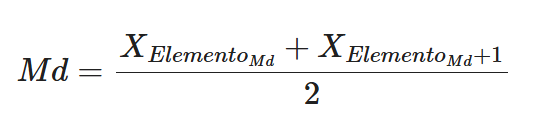

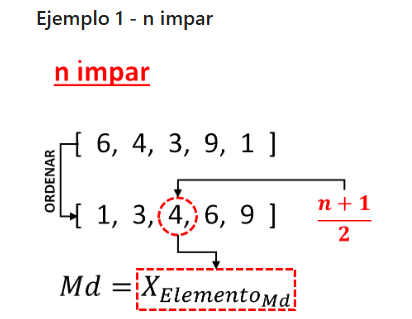

In [77]:
notas_maria = df['María']

notas_maria

,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [78]:
# Primer paso, vamos a ordenar

notas_maria = notas_maria.sort_values()
notas_maria

,María
Inglés,4
Historia,6
Geografía,8
Matemática,8
Química,8
Portugués,10
Física,10


In [79]:
# Tenemos un calculo impar, para identificarlo vamos a usar el .shape

n = notas_maria.shape[0]
n

7

Reseteamos el index

In [80]:
notas_maria = notas_maria.reset_index()

In [81]:
notas_maria

,index,María
0,Inglés,4
1,Historia,6
2,Geografía,8
3,Matemática,8
4,Química,8
5,Portugués,10
6,Física,10


In [82]:
elemento_md = (n+1) / 2
elemento_md

4.0

In [84]:
notas_maria.loc[elemento_md - 1] #Python cuenta desde 0

,3
index,Matemática
María,8


In [85]:
# Usando la función .median()

notas_maria['María'].median()

8.0

In [86]:
notas_pedro = df['Pedro'].sample(6, random_state=200) #Para que el ejemplo sea mas dinamico
notas_pedro

,Pedro
Geografía,1.0
Física,9.5
Química,10.0
Historia,3.0
Matemática,10.0
Portugués,2.0


In [87]:
n = notas_pedro.shape[0]
n

6

In [89]:
notas_pedro = notas_pedro.reset_index()

In [90]:
notas_pedro

,index,Pedro
0,Geografía,1.0
1,Física,9.5
2,Química,10.0
3,Historia,3.0
4,Matemática,10.0
5,Portugués,2.0


In [94]:
elemento_md = int(n / 2)
elemento_md

3

In [97]:
# To calculate the median for an even number of observations, we average the two middle elements.
# Since we have already reset the index, we can use integer-based indexing with .iloc()
(notas_pedro.iloc[elemento_md - 1, 1] + notas_pedro.iloc[elemento_md, 1]) / 2

np.float64(6.5)

#### Obtener la mediana en nuestro conjunto de datos

In [98]:
datos.Ingreso.median()

1200.0

### 3.3 Moda

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

In [99]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [101]:
ejemplo = pd.Series([1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 7])
ejemplo

,0
0,1
1,2
2,2
3,3
4,3
5,3
6,4
7,4
8,4
9,5


In [102]:
ejemplo.mode()

,0
0,3
1,4


In [104]:
datos.Ingreso.mode()

,Ingreso
0,788


In [105]:
datos.Altura.mode()

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


No existe un valor unico enm este ejemplo, por lo que se define como multimodal

### 3.4 Relación entre media, mediana y moda

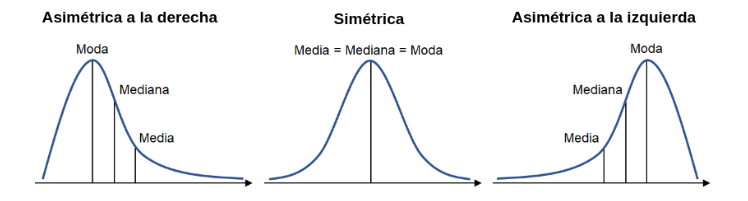

#### Evaluando la variable INGRESO

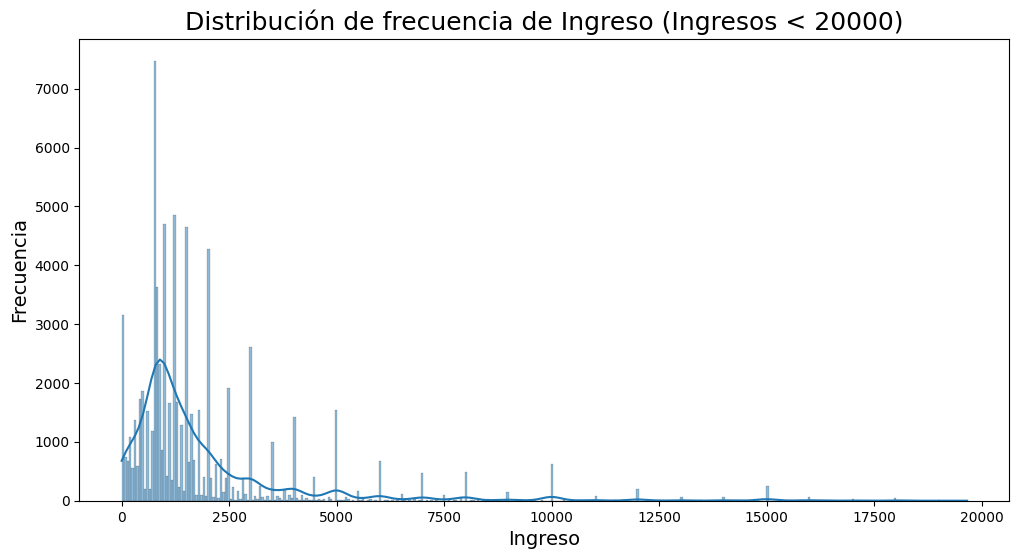

In [108]:
# Creamos el histograma de la variable Ingreso

ax = sns.histplot(datos.query("Ingreso < 20000").Ingreso, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia de Ingreso (Ingresos < 20000)', fontsize=18)
ax.set_xlabel('Ingreso', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
plt.show()

In [118]:
moda = datos.Ingreso.mode()
moda

,Ingreso
0,788


In [119]:
mediana = datos.Ingreso.median()
mediana

1200.0

In [120]:
media = datos.Ingreso.mean()
media

np.float64(2000.3831988547631)

In [122]:
# Para que sea uun comportamiento asimetricamente a la derecha debe cumplir lo siguiente

moda.iloc[0] < mediana < media

np.True_

#### Evaluando la variable ALTURA

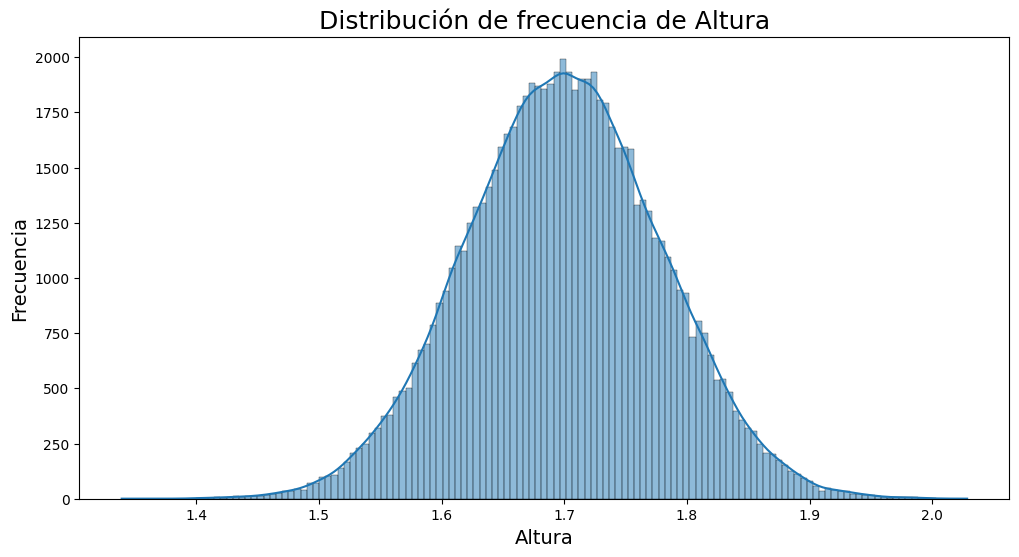

In [123]:
ax = sns.histplot(datos['Altura'], kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia de Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.set(xlabel='Altura', ylabel='Frecuencia')

plt.show()

In [124]:
moda = datos.Altura.mode()
moda

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


In [125]:
media = datos.Altura.mean()
media

np.float64(1.6995124540575741)

In [126]:
mediana  = datos.Altura.median()
mediana

1.6993247325

#### Evaluando la variable AÑOS DE ESTUDIO

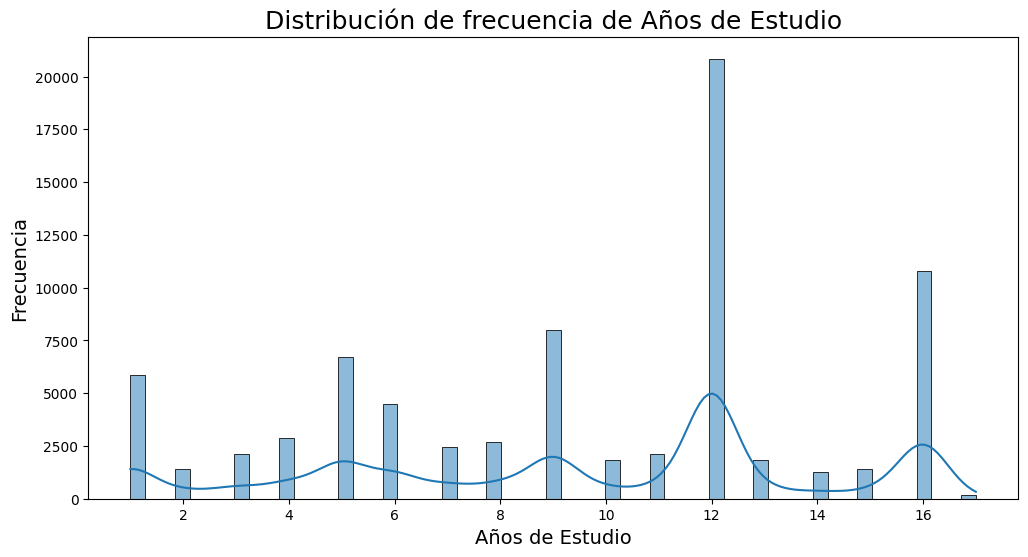

In [128]:
ax = sns.histplot(datos['Años de Estudio'], kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia de Años de Estudio', fontsize=18)
ax.set_xlabel('Años de Estudio', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.set(xlabel='Años de Estudio', ylabel='Frecuencia')

plt.show()

In [129]:
moda = datos['Años de Estudio'].mode()
moda

,Años de Estudio
0,12


In [131]:
mediana = datos['Años de Estudio'].median()
mediana

11.0

In [134]:
media = datos['Años de Estudio'].mean()
media

np.float64(9.469664237376367)

Al tener la moda como valor mayor, nos encontramos con un conjunto asimetrico a la derecha

## MEDIDAS DE LOCALIZACIÓN

Las medidas de localizacion nos va a permitir identificar la distribucipon del conjunto de datos, nos brinda información sobre el comportamiento y tendencias

### 4.1 Cuartiles, deciles y percentiles

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales.

In [135]:
# Utilizamos la función quantile para conmocer la distribución por cuartiles

datos.Ingreso.quantile([0.25, 0.5, 0.75])

,Ingreso
0.25,788.0
0.50,1200.0
0.75,2000.0


In [136]:
# Vamos a utilizar una función i con un rango (1, 10)

[i/10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [137]:
# Vamos a usar ese codigo con llos cuartiles

datos.Ingreso.quantile([i/10 for i in range(1, 10)])

,Ingreso
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


Aqui podemos ver por porcentajes la media del salario, es decir arriba del 40% gana al rdededor de 1500

In [139]:
datos.Ingreso.quantile([i/100 for i in range(1, 100)])

,Ingreso
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
0.05,100.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


Aqui podemos ver que el 5% de nuestra base de datos gana hasta 100 SM
Y tambien 0.95 gana 6000 SM
A medida que avanza podemos ver como se distribuye


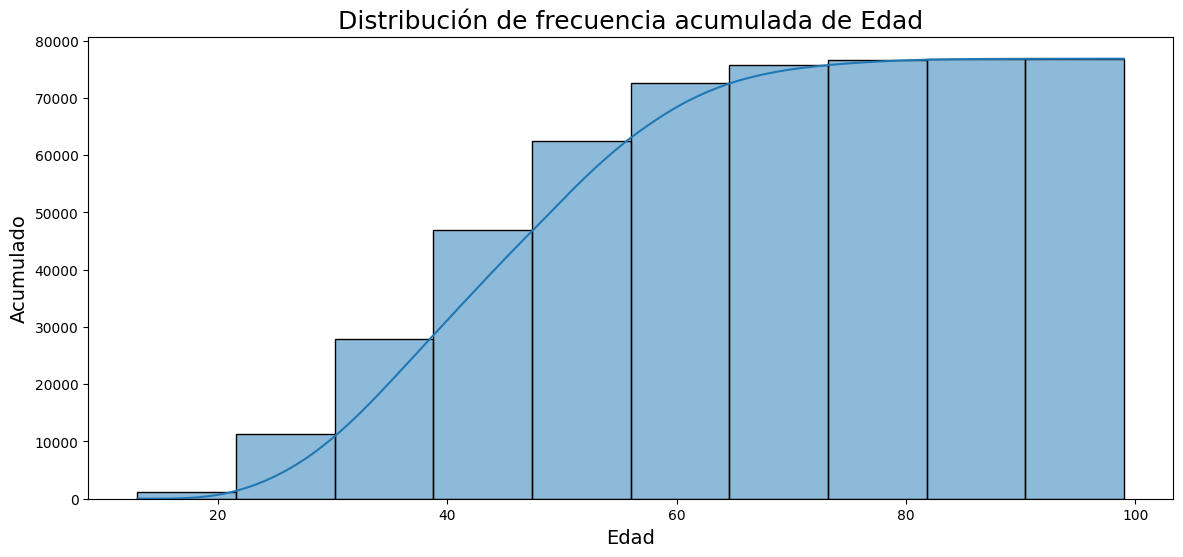

In [143]:
ax = sns.histplot(datos.Edad,
                  cumulative=True,
                  kde=True,
                  bins = 10)

ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de frecuencia acumulada de Edad', fontsize=18)
ax.set_ylabel('Acumulado', fontsize= 14)
ax.set_xlabel('Edad', fontsize= 14)
plt.show()

In [144]:
datos.Edad.quantile([i/10 for i in range(1, 10)])

,Edad
0.1,28.0
0.2,33.0
0.3,36.0
0.4,40.0
0.5,43.0
0.6,47.0
0.7,51.0
0.8,55.0
0.9,61.0


### 4.2 Box-plot

El box plot da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por IIQ
 (distancia inter cuartil). Las posiciones relativas de Q1, MEDIANA y Q3
 dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

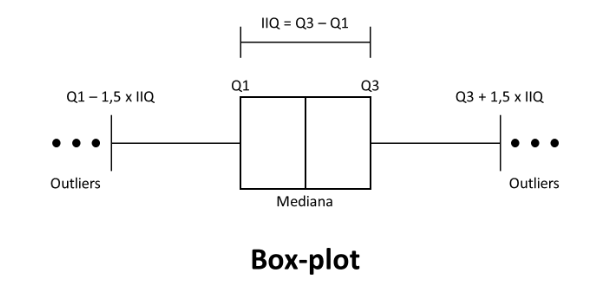

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

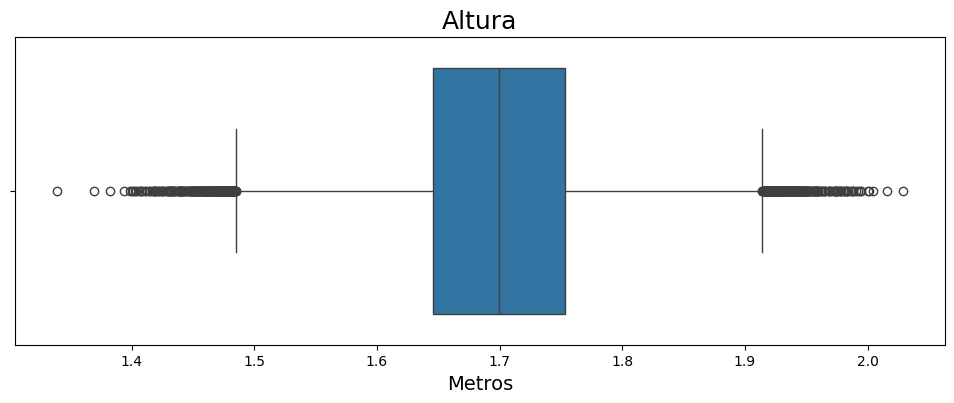

In [145]:
# Vamos a crear un boxplot de la variable Altura

ax = sns.boxplot(x = 'Altura', data=datos, orient='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Aqui podemos interprestar como la distribución simetrica se representa igual que en el histograma, vemos los valores a los extremos los outliers, aquellos que no tienen demasiada frecuencia y no impactan el conjunto de datos

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

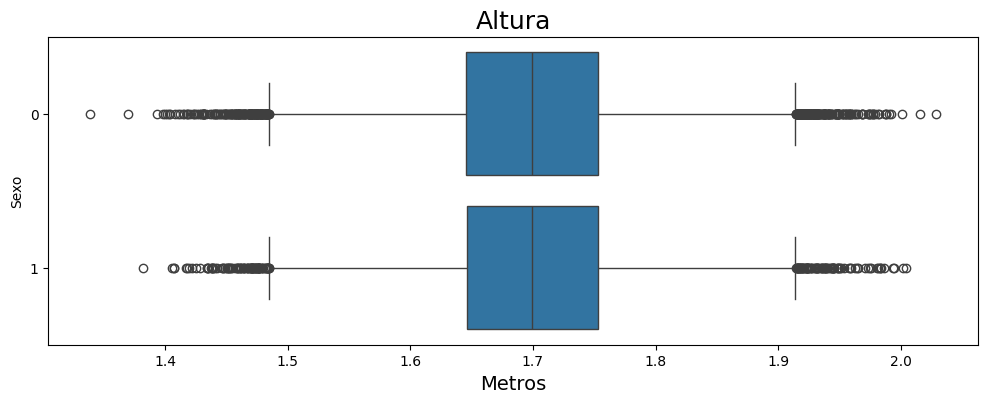

In [146]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data=datos, orient='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Este grafico nos muestra de manera rapida el comportamiento similar entre la distribución por altura y sexo

<Axes: title={'center': 'Ingreso'}, xlabel='Metros'>

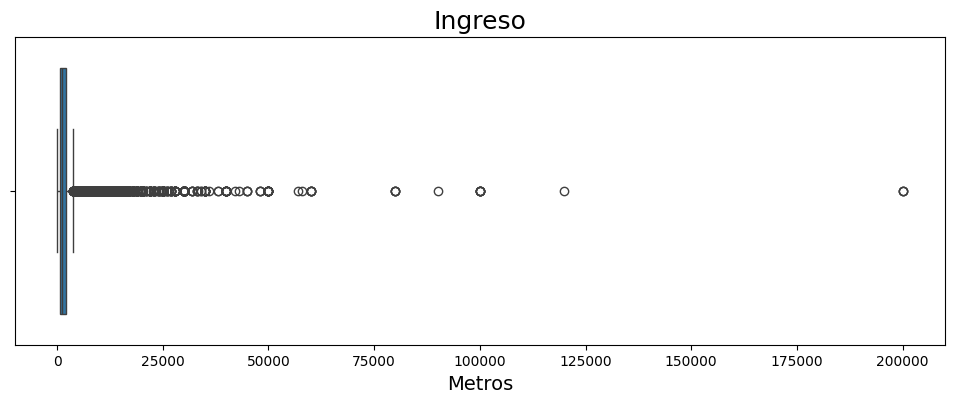

In [147]:
ax = sns.boxplot(x = 'Ingreso', data=datos, orient='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Hacemos un ajuste, que nos permita concentranos en la mayor distribución

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos'>

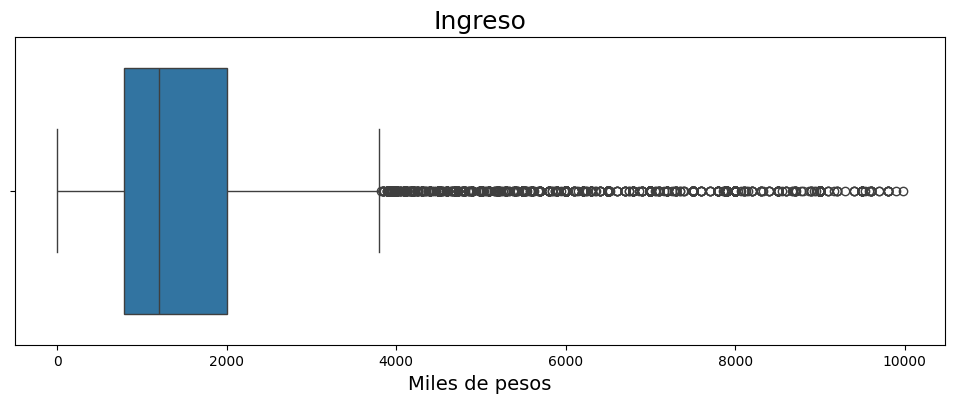

In [149]:
ax = sns.boxplot(x = 'Ingreso', data=datos.query("Ingreso < 10000"), orient='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax

No es una variable simetrica, la concentración esta mas cerca del lado izquierdo

Los outliers superan el limite superior, debemos tener cuidado al trabajar con ellos porque pueden afectar diversos análisis

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos', ylabel='Sexo'>

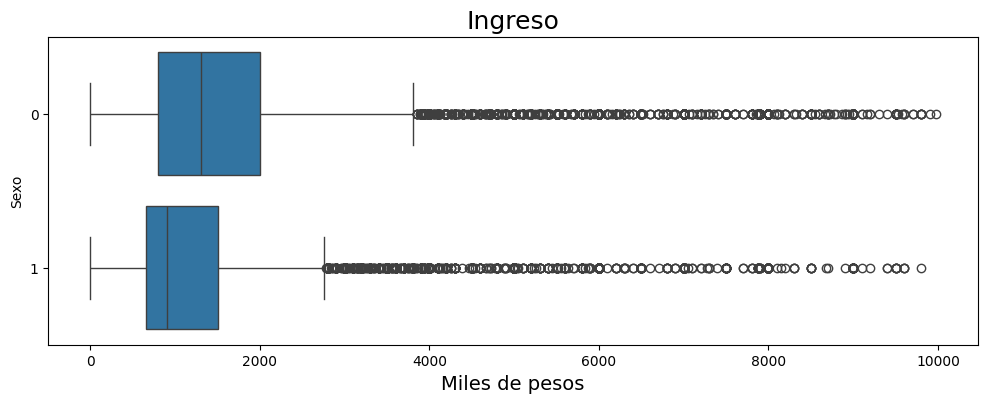

In [150]:
ax = sns.boxplot(x = 'Ingreso', y = 'Sexo', data=datos.query("Ingreso < 10000"), orient='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax

El sexo masculino, gana mas en SM que las mujeres, la parte de las mujeres ta mas cerca del valor 0, ambos presentan valores outliers fuera del limite

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años'>

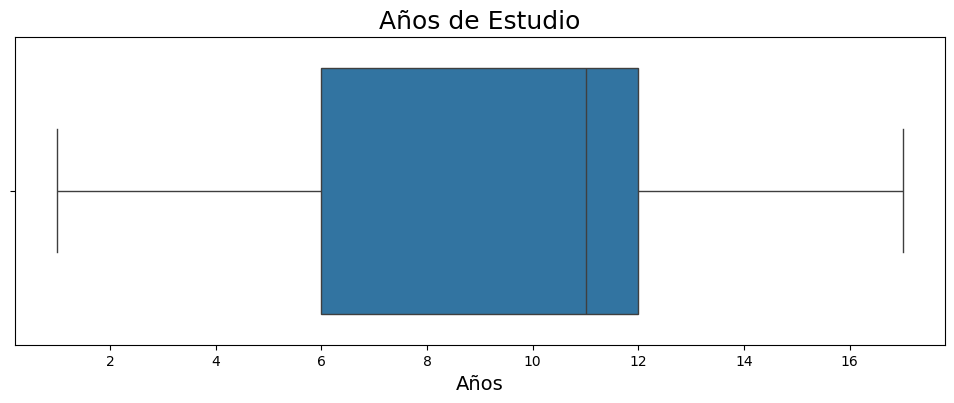

In [152]:
ax = sns.boxplot(x = 'Años de Estudio', data=datos, orient='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años', ylabel='Sexo'>

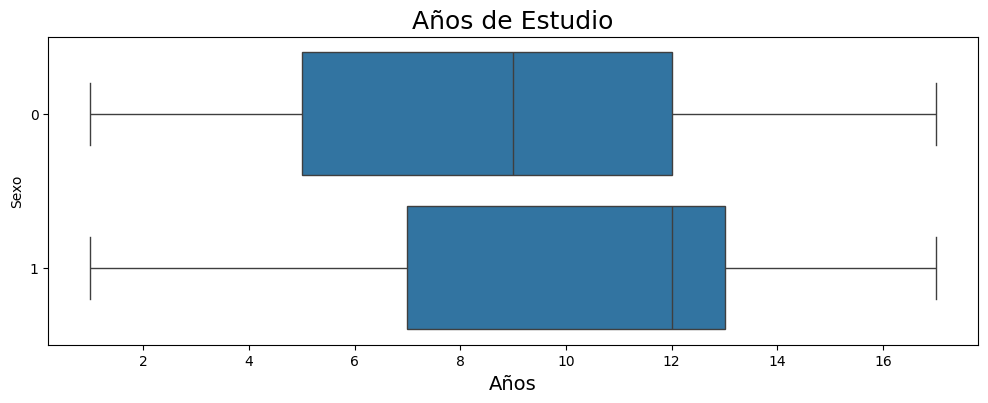

In [153]:
ax = sns.boxplot(x = 'Años de Estudio', y = 'Sexo', data=datos, orient='h')

ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

Podemos ver que hay mas años de estudio por el sexo femenino, esta concentrada entre los 12 años, pero la del sexo masculino esta por los 9 años

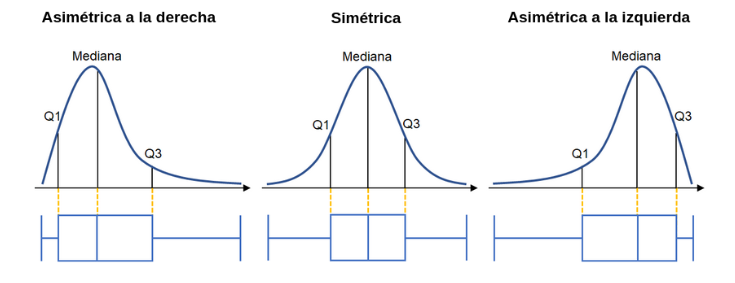

## 5 MEDIDAS DE DISPERSIÓN

Aunque las medidas de tendencia central y de localización proporcionan un resumen muy importante de los datos, pueden no ser suficientes para caracterizar diferentes conjuntos, especialmente cuando las observaciones de una distribución dada presentan datos muy dispersos

5.1 Desviación media absoluta

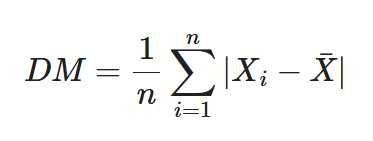

In [154]:
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [158]:
notas_maria_dispersion = df[['María']]
notas_maria_dispersion

Asignaturas,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [159]:
notas_media_maria = notas_maria_dispersion.mean()[0]

/tmp/ipython-input-2666604961.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  notas_media_maria = notas_maria_dispersion.mean()[0]


In [160]:
notas_media_maria

np.float64(7.714285714285714)

In [161]:
notas_maria_dispersion['Desviación'] = np.abs(notas_maria_dispersion['María'] - notas_media_maria)

notas_maria_dispersion

/tmp/ipython-input-2495818391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_maria_dispersion['Desviación'] = np.abs(notas_maria_dispersion['María'] - notas_media_maria)


Asignaturas,María,Desviación
Matemática,8,0.285714
Portugués,10,2.285714
Inglés,4,3.714286
Geografía,8,0.285714
Historia,6,1.714286
Física,10,2.285714
Química,8,0.285714


Podemos ver la desviación respecto a sus notas, recuerda que no puede haber valores negativos

In [162]:
# Vamos a instalar scipy

!pip install scipy

In [163]:
import scipy.stats as stats

In [165]:
# Realizamos el calculo

mad_notas_maria = stats.median_abs_deviation(notas_maria_dispersion['María'])

mad_notas_maria

np.float64(2.0)

### 5.2 Varianza

**Varianza**

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media son elevadas al cuadrado.

Varianza de la población

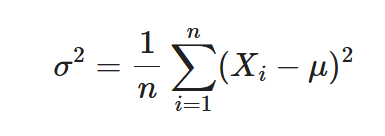

Varianza de la muestra

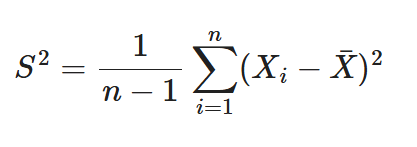

In [166]:
notas_maria_dispersion['(Desviación)^2'] = notas_maria_dispersion['Desviación'].pow(2)

notas_maria_dispersion

Asignaturas,María,Desviación,(Desviación)^2
Matemática,8,0.285714,0.081633
Portugués,10,2.285714,5.224490
Inglés,4,3.714286,13.795918
Geografía,8,0.285714,0.081633
Historia,6,1.714286,2.938776
Física,10,2.285714,5.224490
Química,8,0.285714,0.081633


In [170]:
# Ahora vamos a identificar el valor de la varianza

notas_maria_dispersion['(Desviación)^2'].sum() / (len(notas_maria_dispersion) - 1)

np.float64(4.57142857142857)

In [171]:
# Ahora utilizamos la función varianza

notas_maria_dispersion['María'].var()

4.57142857142857

### 5.3 Desviación estándar

Una de las restricciones de la varianza es el hecho de que proporciona medidas cuadráticas de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por lo tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

**Desviación estándar de la población**

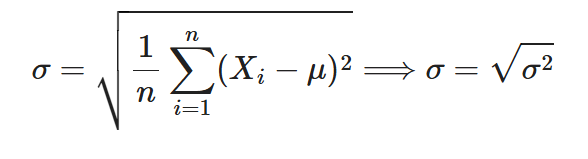


**Desviación estándar de la muestra**

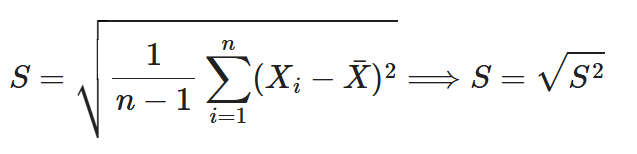

In [172]:
varianza = notas_maria_dispersion['María'].var()
varianza

4.57142857142857

In [173]:
np.sqrt(varianza)

np.float64(2.1380899352993947)

In [174]:
desviacion_estandar = notas_maria_dispersion['María'].std()
desviacion_estandar

2.1380899352993947

In [175]:
df.mean()

,0
Asignaturas,
María,7.714286
Pedro,5.142857
Pablo,7.714286


In [176]:
df.median()

,0
Asignaturas,
María,8.0
Pedro,3.0
Pablo,8.0


In [177]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [178]:
df.std()

,0
Asignaturas,
María,2.138090
Pedro,4.460141
Pablo,0.566947
